*First, we import the required libraries. We will use kagglehub to download the dataset from Kaggle, and pandas/numpy for data handling.*


In [1]:
from google.colab import files
files=files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [2]:
import pandas as pd

# Read the CSV files
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

print("True shape:", true.shape)
print("Fake shape:", fake.shape)

True shape: (21417, 4)
Fake shape: (23481, 4)


In [3]:
true["label"] = 1   # 1 = Real
fake["label"] = 0   # 0 = Fake

In [4]:
df = pd.concat([true, fake], axis=0).reset_index(drop=True)
print("Combined shape:", df.shape)
df.head()

Combined shape: (44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
# Check for missing values
print(df.isnull().sum())

# Check duplicates
print("Duplicates:", df.duplicated().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64
Duplicates: 209


In [6]:
# Remove duplicates if any
df = df.drop_duplicates().reset_index(drop=True)

# Remove rows with missing values if necessary
df = df.dropna().reset_index(drop=True)

print("After cleaning:", df.shape)

After cleaning: (44689, 5)


In [7]:
df.to_csv("cleaned_fake_news.csv", index=False)
print("Dataset saved successfully.")

Dataset saved successfully.



## Fake News Detection – Data Preparation

Objective
Build a dataset for detecting fake and real news articles.

Steps Taken
1. Imported data (True.csv, Fake.csv).
2. Added labels.
3. Merged datasets.
4. Checked for missing values and duplicates.
5. Cleaned the data.
6. Saved cleaned_fake_news.csv.

Output
- Clean dataset (text + label).
- Ready for next phase.

*Secondly , we will Preprocess the text using technques such Lowercasing , Tokenization , removing punctuations,numbers,urls,emails , and Lemmatization*

In [8]:
# Text Preprocessing
import spacy, re

nlp = spacy.load("en_core_web_sm")

def preprocessText(text):
    # lowercasing
    text = text.lower()
    # remove mails , numbers , and urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization
    doc = nlp(text)
    preprocessed = [token for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

    # Lemmatization
    clean = [token.lemma_.strip() for token in preprocessed if token.lemma_.strip()]

    return clean


In [9]:
df['Clean Text'] = df['text'].apply(lambda x:preprocessText(x))

# Thirdly, we will perform Exploratory Data Analysis (EDA) to explore class distribution, text lengths, and common patterns in the data.

Import Libraries

In [10]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use("ggplot")
sns.set_theme()


Load Cleaned Dataset

In [11]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_fake_news.csv")

print("Shape:", df.shape)
df.head()

Shape: (44689, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Dataset Info

In [12]:
# Check column info
df.info()

# Check label distribution
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


,count
label,
0,23478
1,21211


Plot Class Balance

/tmp/ipython-input-3486764429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='coolwarm')


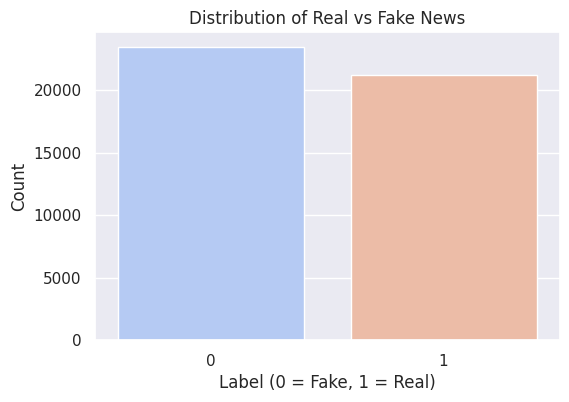

In [13]:
# Countplot for real vs fake
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()

Article Length Analysis

In [14]:
# Add column for text length (number of words)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Describe text length
df['text_length'].describe()

,text_length
count,44689.000000
mean,404.966502
std,351.573770
min,0.000000
25%,203.000000
50%,362.000000
75%,512.000000
max,8135.000000


Distribution of Text Lengths

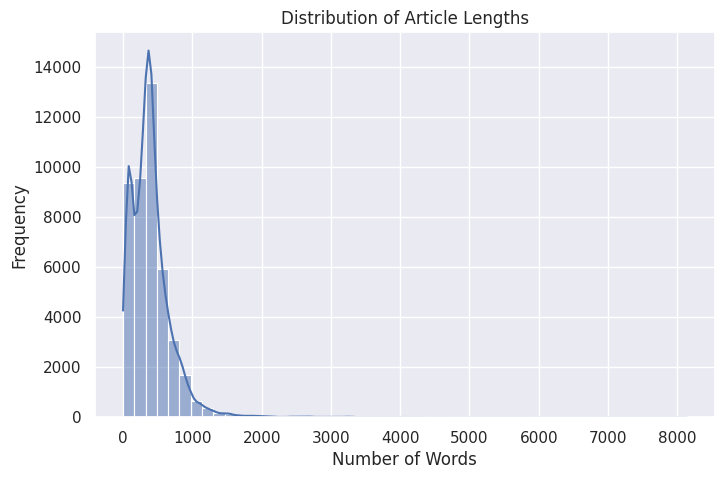

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Compare Lengths Between Real & Fake

/tmp/ipython-input-2429393060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='text_length', palette="Set2")


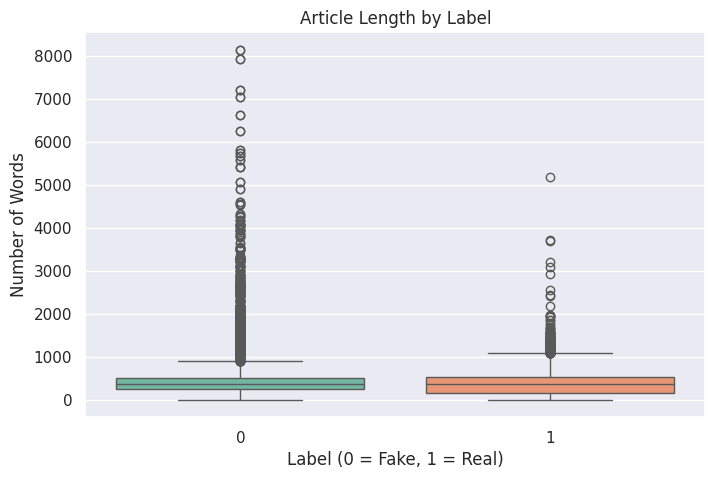

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='label', y='text_length', palette="Set2")
plt.title("Article Length by Label")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Number of Words")
plt.show()

Most Common Words (WordCloud)

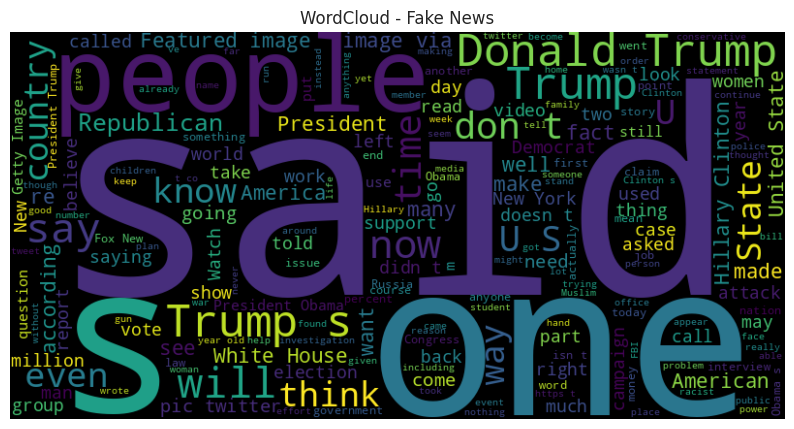

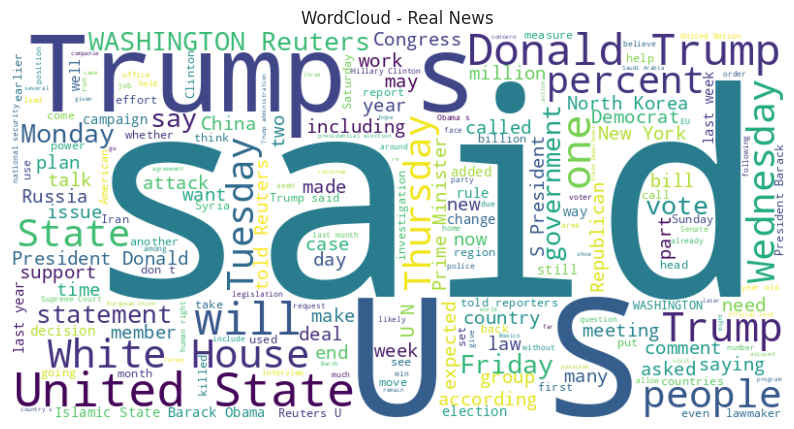

In [17]:
from wordcloud import WordCloud

# Fake news wordcloud
fake_text = " ".join(df[df['label']==0]['text'].astype(str))
wordcloud_fake = WordCloud(width=800, height=400, background_color="black").generate(fake_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Fake News")
plt.show()

# Real news wordcloud
real_text = " ".join(df[df['label']==1]['text'].astype(str))
wordcloud_real = WordCloud(width=800, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Real News")
plt.show()

N-grams Analysis (Top Bigrams/Trigrams)

In [20]:
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')
# Download the specific resource needed for tokenization
nltk.download('punkt_tab')

def get_top_ngrams(corpus, n=None, gram=2):
    vec = []
    for text in corpus:
        tokens = nltk.word_tokenize(str(text).lower())
        vec.extend(list(ngrams(tokens, gram)))
    return Counter(vec).most_common(n)

# Fake news bigrams
print("Top 10 bigrams in Fake News:")
print(get_top_ngrams(df[df['label']==0]['text'], n=10, gram=2))

# Real news bigrams
print("Top 10 bigrams in Real News:")
print(get_top_ngrams(df[df['label']==1]['text'], n=10, gram=2))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top 10 bigrams in Fake News:
[(('of', 'the'), 53857), (('in', 'the'), 39032), ((',', 'and'), 38041), ((',', 'the'), 29676), (('to', 'the'), 27634), (('.', 'the'), 24731), (('on', 'the'), 18628), (('(', '@'), 17769), (('it', 's'), 17367), (('to', 'be'), 16402)]
Top 10 bigrams in Real News:
[(('’', 's'), 54572), (('of', 'the'), 47155), (('.', 'the'), 45665), (('in', 'the'), 40557), (('.', '“'), 27102), ((',', 'the'), 26681), ((',', '”'), 24339), (('to', 'the'), 21972), (('said', '.'), 21327), ((')', '-'), 21143)]


Correlation Heatmap

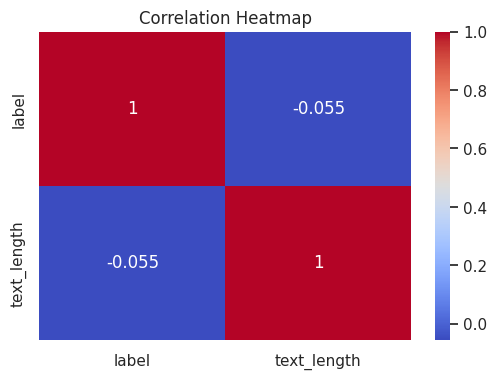

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['label','text_length']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 📊 This EDA covers:

1. Distribution of labels (Real vs Fake).
2. Analysis of article lengths.
3. Comparison of text length between Real and Fake news.
4. WordCloud of the most frequent words.
5. Most common bigrams and trigrams.
6. Simple correlation with text lengths.
